# Notebook to combine all well data for visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

%matplotlib inline

In [2]:
wells = pd.read_csv('../data/wells/well production.csv')

cumulative_productions = []

for index, row in wells.iterrows():
    cumulative_productions.append(row.values[3:15].sum())

wells['cumulative production'] = cumulative_productions
wells.head()

,Unnamed: 0,well name,average pressure (Pa),oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,oil 7,...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,cumulative production
0,0,Tarragon 4-119H,26180969,10809.0,10108.0,9352.0,8626.0,7856.0,7137.0,6430.0,...,1481.0,1367.0,1237.0,1069.0,982.0,857.0,733.0,593.0,472.0,81324.0
1,1,Fennel 10-129H,36433680,2049.0,1932.0,1784.0,1649.0,1499.0,1364.0,1226.0,...,210.0,205.0,200.0,157.0,148.0,136.0,97.0,91.0,87.0,15600.0
2,2,Federal 14-113H,36642888,11699.0,10905.0,10149.0,9365.0,8521.0,7732.0,6919.0,...,661.0,617.0,541.0,466.0,435.0,394.0,340.0,266.0,213.0,88023.0
3,3,King 7-184H,30429506,5980.0,5580.0,5176.0,4789.0,4405.0,3978.0,3581.0,...,471.0,453.0,417.0,346.0,343.0,275.0,231.0,238.0,164.0,45171.0
4,4,Sundae 1-129H,42591950,3892.0,3646.0,3399.0,3133.0,2834.0,2577.0,2309.0,...,974.0,902.0,806.0,790.0,668.0,570.0,468.0,394.0,322.0,29484.0


In [3]:
dataframes = []
directory = '../data/wells/'

for index, row in wells.iterrows():
    well_name = row['well name']
    well = pd.read_csv(directory + well_name + '.csv')
    well['name'] = well_name
    well['cumulative production'] = row['cumulative production']
    dataframes.append(well)
        
data = pd.concat(dataframes)
data.to_csv('../data/all_wells.csv', index=False)

In [4]:
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),name,cumulative production
0,66100.0,22300.0,0.09,0.033,0.332,9440769.483,0.124740,0.875260,260036.414279,275.737593,Tarragon 4-119H,81324.0
1,66199.0,22300.0,0.12,0.057,0.332,9429043.880,0.124979,0.875021,NaN,NaN,Tarragon 4-119H,81324.0
2,66297.0,22300.0,0.11,0.050,0.332,9417413.010,0.125221,0.874779,429740.754787,324.145032,Tarragon 4-119H,81324.0
3,66396.0,22300.0,0.08,0.024,0.332,9405879.454,0.125469,0.874531,NaN,NaN,Tarragon 4-119H,81324.0
4,66495.0,22300.0,0.08,0.031,0.332,9394445.773,0.125720,0.874280,485657.822229,320.868488,Tarragon 4-119H,81324.0


In [5]:
def plot_feature(feature):
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.title(feature)
    plt.scatter(data['easting'], data['northing'], c=data[feature])
    plt.colorbar(label=feature)

Visualizing porosity

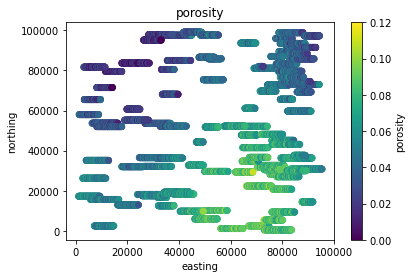

In [6]:
plot_feature('porosity')

Plotting permeability

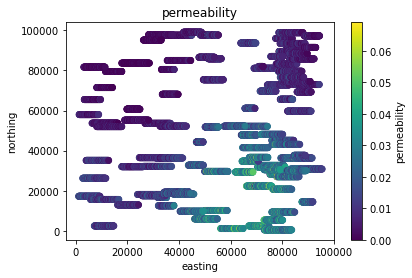

In [7]:
plot_feature('permeability')

Plotting Poisson's ratio

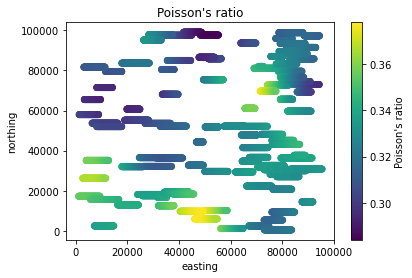

In [8]:
plot_feature('Poisson\'s ratio')

Plotting Young's Modulus

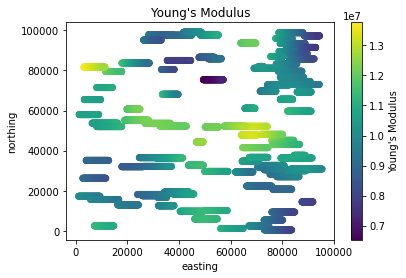

In [9]:
plot_feature('Young\'s Modulus')

Plotting water saturation

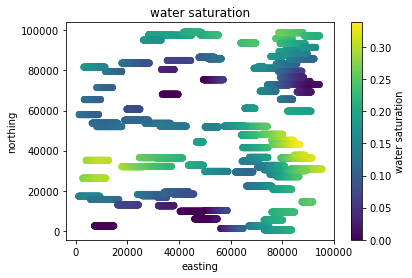

In [10]:
plot_feature('water saturation')

Plotting oil saturation

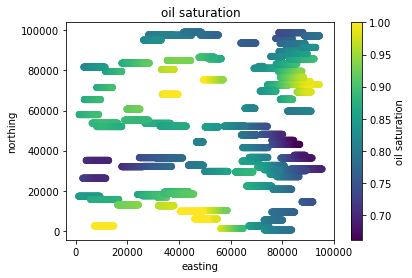

In [11]:
plot_feature('oil saturation')